In [66]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
np.set_printoptions(precision=2)

In [67]:
def lowess(x, y, f=2. / 3., iter=3):
    """Robust locally weighted regression.

    Inputs:
       - x, y: dataset
       - f: smoothing parameter
       - iter: number of robustifying iterations
    """
    n = len(x)
    r = int(math.ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    y_pred = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = np.linalg.solve(A, b)
            y_pred[i] = beta[0] + beta[1] * x[i]

        residuals = y - y_pred
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return y_pred

In [70]:
n = 100
x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)

In [90]:
y_pred = lowess(x, y, f=0.4, iter=3)

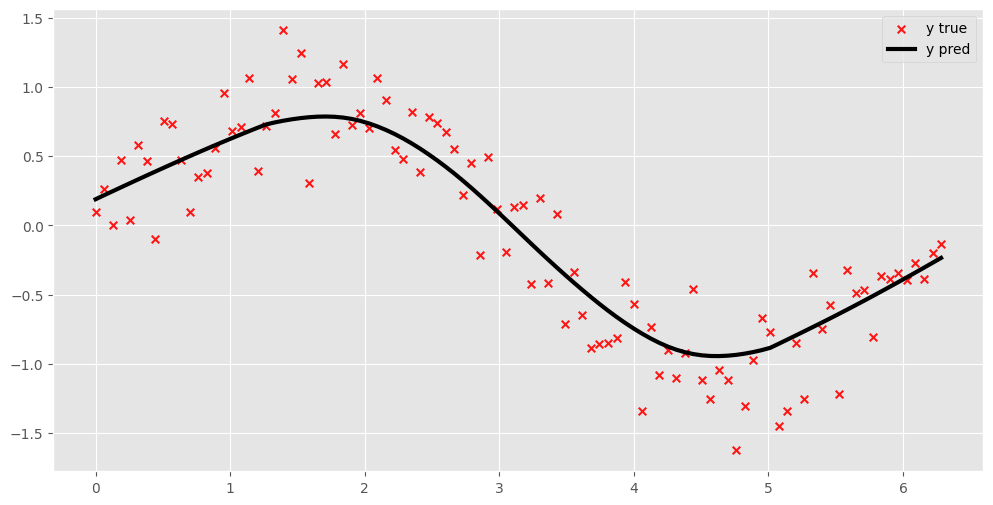

In [91]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=30, c='r', marker='x', alpha=0.9, label='y true')
plt.plot(x, y_pred, 'k', lw=3, label='y pred')
plt.legend()
plt.show()

In [94]:
def load_house_dataset(filename='/content/house_price.txt', delimiter=','):
    data = np.genfromtxt(filename, delimiter=delimiter)
    x, y = data[:, 0], data[:, 1]
    return x, y

In [116]:
x, y = load_house_dataset()

In [97]:
x.shape

(41,)

In [98]:
y.shape

(41,)

In [103]:
print(x)

[ 2104.  1600.  2400.  1416.  1985.  1534.  1427.  1380.  1494.  1940.
  2000.  1890.  1268.  2300.  1320.  1236.  2609.  1767.  1888.  1604.
  1962.  1100.  1458.  2526.  2200.  2637.  1839.  1000.  2040.  1811.
  1437.  1239.  2132.  2162.  1664.  2238.  2567.  1200.   852.  1852.
  1203.]


In [117]:
idx = np.argsort(x)

In [100]:
idx

array([38, 27, 21, 37, 40, 15, 31, 12, 14,  7,  3,  6, 30, 22,  8,  5,  1,
       19, 34, 17, 29, 26, 39, 18, 11,  9, 20,  4, 10, 28,  0, 32, 33, 24,
       35, 13,  2, 23, 36, 16, 25])

In [118]:
x, y = x[idx], y[idx]

In [112]:
x

array([  852.,  1000.,  1100.,  1200.,  1203.,  1236.,  1239.,  1268.,
        1320.,  1380.,  1416.,  1427.,  1437.,  1458.,  1494.,  1534.,
        1600.,  1604.,  1664.,  1767.,  1811.,  1839.,  1852.,  1888.,
        1890.,  1940.,  1962.,  1985.,  2000.,  2040.,  2104.,  2132.,
        2162.,  2200.,  2238.,  2300.,  2400.,  2526.,  2567.,  2609.,
        2637.])

In [110]:
x[38]

852.0

In [119]:
y_pred = lowess(x, y, f=0.1, iter=3)

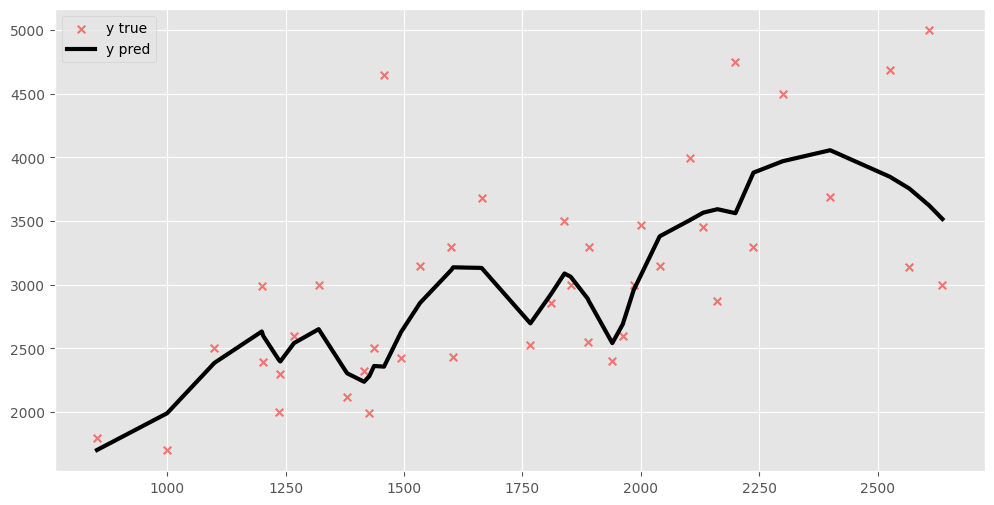

In [120]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=30, c='r', marker='x', alpha=0.5, label='y true')
plt.plot(x, y_pred, 'k', lw=3, label='y pred')
plt.legend()
plt.show()

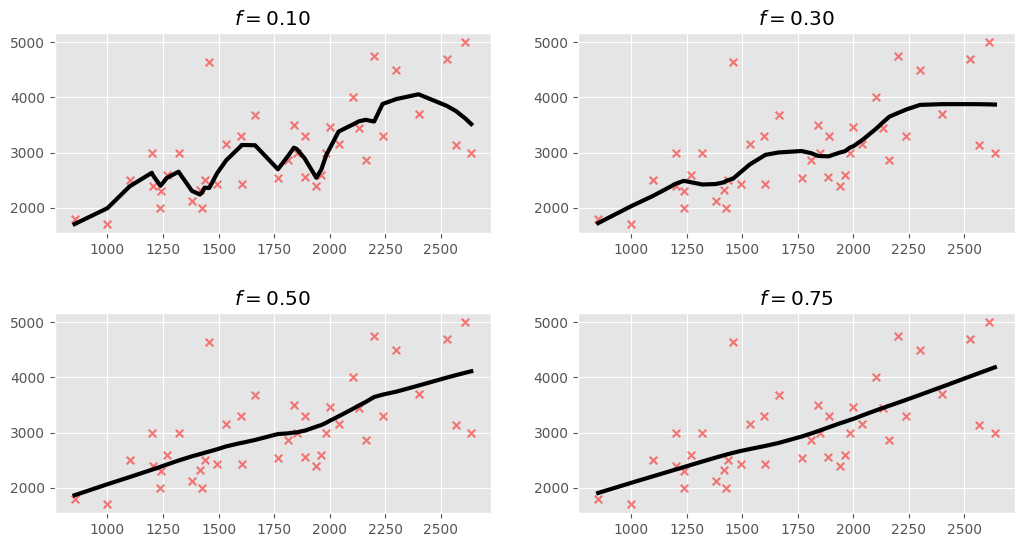

In [121]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

plt.subplot(221)
y_pred = lowess(x, y, f=0.1, iter=3)
plt.scatter(x, y, s=30, c='r', marker='x', alpha=0.5, label='y true')
plt.plot(x, y_pred, 'k', lw=3, label='y pred')
plt.title('$f=0.10$')

plt.subplot(222)
y_pred = lowess(x, y, f=0.3, iter=3)
plt.scatter(x, y, s=30, c='r', marker='x', alpha=0.5, label='y true')
plt.plot(x, y_pred, 'k', lw=3, label='y pred')
plt.title('$f=0.30$')

plt.subplot(223)
y_pred = lowess(x, y, f=0.5, iter=3)
plt.scatter(x, y, s=30, c='r', marker='x', alpha=0.5, label='y true')
plt.plot(x, y_pred, 'k', lw=3, label='y pred')
plt.title('$f=0.50$')

plt.subplot(224)
y_pred = lowess(x, y, f=0.75, iter=3)
plt.scatter(x, y, s=30, c='r', marker='x', alpha=0.5, label='y true')
plt.plot(x, y_pred, 'k', lw=3, label='y pred')
plt.title('$f=0.75$')

plt.show()